# Part 1: Introduction to SpatialData & Interactive Exploration

**Instructor:** Tim Treis
**Time:** 40 minutes

---

Welcome to the workshop! In this first notebook, we will introduce the core concepts behind the `SpatialData` framework.

**Goals:**
1. Understand the different components of a spatial dataset (Images, Labels, Shapes, Points).
2. Learn how the `SpatialData` object acts as a unified container for these components.
3. Gain hands-on experience exploring complex spatial data interactively with `napari`.

## What is a `SpatialData` object?

Modern spatial omics experiments generate diverse types of data. For example, a single experiment might produce:

*   A high-resolution histology image (**Image**).
*   Segmentation masks defining where the cells are (**Labels**).
*   Polygons outlining cell boundaries (**Shapes**).
*   The locations of individual RNA molecules (**Points**).
*   A table of gene counts per cell (**Table**).

The `SpatialData` framework, part of the `scverse` ecosystem, provides a single, standardized object to hold all these different *elements* together in a coordinated way.

<img src="../resources/elements.png" alt="spatialdata design is modular" style="max-width: 800px;">

## Loading our First Dataset: A Xenium Example

To begin, we will load a pre-processed dataset into a `SpatialData` object. For this workshop, we will be working with the `.zarr` format, which is a modern, high-performance storage format ideal for large scientific data.

Our first dataset is a `Xenium` experiment, which is a great example because it contains all the different types of spatial elements.

In [1]:
# for cleaner output

import warnings
warnings.filterwarnings("ignore")

In [2]:
import spatialdata as sd
from pathlib import Path

# Define the path to our data directory
# Note: This path is relative to the repository's root directory
_DATA_DIR_PATH = Path("../data/")
_XENIUM_PATH = _DATA_DIR_PATH / "xenium_lung_cancer_subset.zarr"
_MERFISH_PATH = _DATA_DIR_PATH / "merfish_subset.zarr"

print(f"Loading data from '{_XENIUM_PATH}'")

# Load the pre-processed Xenium dataset
sdata_xenium = sd.read_zarr(_XENIUM_PATH)

Loading data from '../data/xenium_lung_cancer_subset.zarr'


Let's inspect the `SpatialData` object we just created. We can directly access the contained images by their name.

In [3]:
sdata_xenium

SpatialData object, with associated Zarr store: /Users/tim.treis/Documents/GitHub/Spatial-Workshop/data/xenium_lung_cancer_subset.zarr
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 5636, 1448), (3, 2818, 724), (3, 1409, 362), (3, 704, 181), (3, 352, 90)
│     └── 'morphology_focus': DataTree[cyx] (1, 17098, 51187), (1, 8549, 25593), (1, 4274, 12796), (1, 2137, 6398), (1, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with 

### Images 

We see that the contained **Images** are represented as a [`xarray.DataTree`](https://docs.xarray.dev/en/latest/generated/xarray.DataTree.html) which we use for **multiscale images**. These are image pyramids that store the same image at different resolutions, which is key for fast visualization of very large images.

![image pyramid](../resources/image_pyramid.png)

In [4]:
sdata_xenium.images["morphology_focus"]

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (c: 1, y: 17098, x: 51187)
│       Coordinates:
│         * c        (c) <U4 16B 'DAPI'
│         * y        (y) float64 137kB 0.5 1.5 2.5 3.5 ... 1.71e+04 1.71e+04 1.71e+04
│         * x        (x) float64 409kB 0.5 1.5 2.5 3.5 ... 5.118e+04 5.119e+04 5.119e+04
│       Data variables:
│           image    (c, y, x) uint16 2GB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale1
│       Dimensions:  (c: 1, y: 8549, x: 25593)
│       Coordinates:
│         * c        (c) <U4 16B 'DAPI'
│         * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
│         * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
│       Data variables:
│           image    (c, y, x) uint16 438MB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale2
│       Dimensions:  (c: 1, y: 4274, x: 12796)
│       Coordinates:
│         * c        (c) <U4 16B 'DAPI'
│         * y        (y) float64 34kB 2.0 6.001 10.0 ... 1.709e+04 1.709e+04 1.71e+04
│         * x        (x) float64 102kB 2.0 6.0 10.0 ... 5.118e+04 5.118e+04 5.118e+04
│       Data variables:
│           image    (c, y, x) uint16 109MB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale3
│       Dimensions:  (c: 1, y: 2137, x: 6398)
│       Coordinates:
│         * c        (c) <U4 16B 'DAPI'
│         * y        (y) float64 17kB 4.0 12.0 20.0 ... 1.708e+04 1.709e+04 1.709e+04
│         * x        (x) float64 51kB 4.0 12.0 20.0 ... 5.117e+04 5.117e+04 5.118e+04
│       Data variables:
│           image    (c, y, x) uint16 27MB dask.array<chunksize=(1, 2137, 4096), meta=np.ndarray>
└── Group: /scale4
        Dimensions:  (c: 1, y: 1068, x: 3199)
        Coordinates:
          * c        (c) <U4 16B 'DAPI'
          * y        (y) float64 9kB 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
          * x        (x) float64 26kB 8.0 24.0 40.0 ... 5.115e+04 5.116e+04 5.118e+04
        Data variables:
            image    (c, y, x) uint16 7MB dask.array<chunksize=(1, 1068, 3199), meta=np.ndarray>

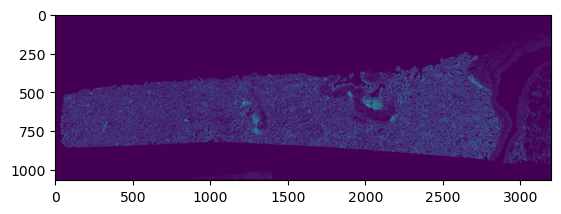

In [5]:
# We can also directly access and plot the data contained

import matplotlib.pyplot as plt

plt.imshow(sdata_xenium.images["morphology_focus"]["scale4"].image.transpose("y", "x", "c"))


### Labels

Similarly, segmentation masks (**Labels**) are also represented as images and can be accessed the same way.

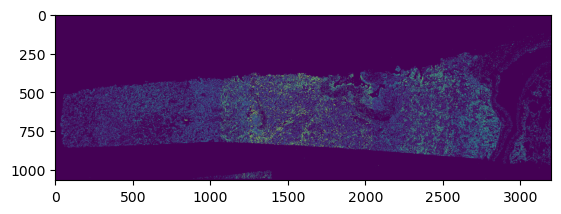

In [6]:
plt.imshow(sdata_xenium.labels["nucleus_labels"]["scale4"].image.transpose("y", "x"))

### Points

The **Points** objects are represented as a [`Dask.DataFrame`](https://docs.dask.org/en/stable/dataframe.html) which allows us to lazily load the points, meaning that not all of them will be loaded into memory immedediately.

In [7]:
sdata_xenium.points["transcripts"]

,x,y,z,feature_name,cell_id,qv,nucleus_distance,codeword_index,fov_name,overlaps_nucleus,transcript_id
npartitions=4,,,,,,,,,,,
,float32,float32,float32,category[unknown],string,float32,float32,int32,string,uint8,uint64
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [8]:
# We can load them on-demand though.

sdata_xenium.points["transcripts"].compute()

,x,y,z,feature_name,cell_id,qv,nucleus_distance,codeword_index,fov_name,overlaps_nucleus,transcript_id
0,66.847679,1439.419434,16.830444,STEAP4,UNASSIGNED,21.359655,346.201141,170,C2,0,281582350893841
1,202.231186,1421.553955,16.527092,THBS2,UNASSIGNED,40.000000,327.802612,46,C2,0,281582350895222
2,60.755959,1427.187744,16.859751,CXCR4,UNASSIGNED,38.001629,359.865814,379,C2,0,281582350896236
3,116.347923,1415.833618,16.661528,CXCR4,UNASSIGNED,40.000000,349.481201,379,C2,0,281582350896244
4,195.983978,1445.074829,16.494038,EGFL7,UNASSIGNED,40.000000,304.836700,223,C2,0,281582350896355
...,...,...,...,...,...,...,...,...,...,...,...
165016,10853.206055,3508.341064,12.386168,MKI67,UNASSIGNED,38.001629,207.292465,90,E19,0,281732674788699
165017,10820.317383,3501.368652,12.573286,FGL2,UNASSIGNED,40.000000,199.983459,290,E19,0,281732674789732
165018,10855.855469,3515.541748,12.474679,SLAMF7,UNASSIGNED,9.356393,214.679245,52,E19,0,281732674792223
165019,10806.734375,3521.945801,14.113171,MLPH,UNASSIGNED,30.295107,221.542557,112,E19,0,281732674794156


### Shapes

The segmentation masks (**Shapes**) are stored as [`geopandas.GeoDataFrame`](https://geopandas.org/en/v1.1.0/docs/reference/api/geopandas.GeoDataFrame.html).

In [9]:
sdata_xenium.shapes["cell_boundaries"]

,geometry
aaaadpbp-1,"POLYGON ((205.062 1489.838, 204.213 1490.475, ..."
aaaaficg-1,"POLYGON ((200.812 1811.988, 199.538 1812.625, ..."
aaabbaka-1,"POLYGON ((177.013 2158.575, 175.525 2159.425, ..."
aaabbjoo-1,"POLYGON ((185.513 2156.238, 184.238 2157.3, 18..."
aaablchg-1,"POLYGON ((197.2 2191.938, 197.413 2192.15, 197..."
...,...
ojaaphhh-1,"POLYGON ((4551.538 1640.925, 4551.325 1641.138..."
ojabeldf-1,"POLYGON ((4437.212 1627.75, 4437 1627.963, 443..."
ojacfbid-1,"POLYGON ((4462.712 1575.05, 4462.288 1575.475,..."
ojacfhhg-1,"POLYGON ((4619.962 1452.863, 4619.75 1453.075,..."


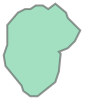

In [10]:
sdata_xenium.shapes["cell_boundaries"].geometry[0]

### Tables

Lastly, tabular data, for example, the table of gene counts, is stored as an [`anndata.AnnData`](https://anndata.readthedocs.io/en/latest/generated/anndata.AnnData.html) object that many of you may be familiar with from single-cell analysis.

In [11]:
sdata_xenium.tables["table"]

AnnData object with n_obs × n_vars = 162254 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

### Interactive Exploration with `napari`

While printing the object summary is useful, the best way to understand spatial data is to *see* it. We use **Napari**, a fast, interactive, multi-dimensional image viewer, to explore our `SpatialData` objects.

The `napari-spatialdata` plugin provides the bridge between our data and the viewer. To demonstrate its features, we'll load a `MERFISH` dataset, another high-resolution imaging-based technology.

In [12]:
sdata_merfish = sd.read_zarr(_MERFISH_PATH)
sdata_merfish

version mismatch: detected: RasterFormatV02, requested: FormatV04


SpatialData object, with associated Zarr store: /Users/tim.treis/Documents/GitHub/Spatial-Workshop/data/merfish_subset.zarr
├── Images
│     └── 'rasterized': DataArray[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (2389, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2389, 268)
with coordinate systems:
    ▸ 'global', with elements:
        rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)

#### Your Turn: Launching Napari

Now, let's launch the interactive viewer. 

**Instructions:**
1. Uncomment and run the code cell below.
2. A new window for Napari should appear. This may take a few seconds.
3. Follow along as we tour the interface and explore the data layers.

**Troubleshooting**
`napari` support within Docker containers is limited. If you are not able to run the notebook with the current Docker configuration, please skip the cell below and follow the demo from the instructor. To run `napari` locally without Docker, please use `mamba`, as explained in [the section "Using conda / mamba" from this guide](https://github.com/PMBio/spatialdata-workshops/tree/main?tab=readme-ov-file#using-conda--mamba).

In [13]:
from napari_spatialdata import Interactive

# run napari
Interactive(sdata_merfish)

<div style="border: 1px solid #4CAF50; border-left-width: 15px; padding: 10px; background-color: #F0FFF0; color: black;">
    <strong>Tip:</strong>
    <p>You can also view a .zarr file from your terminal with:<br><code>python -m napari_spatialdata view ../data/merfish_subset.zarr</code>.</p>
</div>

### Tour of the `napari-spatialdata` Interface

The Napari window is composed of several key parts. The `napari-spatialdata` plugin adds the panels highlighted in green.

![overview of the napari-spatialdata interface](../resources/napari_spatialdata0.jpg)

**Key areas to know:**
- **Layers list (bottom-left):** This is where you can see all the data layers (images, shapes, points) and toggle their visibility, change their order, or adjust their opacity.
- **`spatialdata` viewer (top-right):** This shows you which coordinate systems are available and lets you select elements to view.
- **`spatialdata` table annotation (bottom-right):** This powerful panel lets you color your spatial elements (like cells) by any value in the associated `AnnData` table.

Here is an example of adding elements to the viewer and interacting with them.

![adding elements](../resources/napari_spatialdata1.gif)
![interaction with napari](../resources/napari_spatialdata2.gif)

The real power comes from coloring your spatial elements by their associated data. Here, we color cells by different annotations stored in the `AnnData` table, including categorical variables (`region`) and continuous variables (gene expression).

![showing annotations](../resources/napari_spatialdata3.gif)

The various selectors on the right side of the interface reflect the structure of the `AnnData` object that annotates our spatial elements. The dropdown menus map directly to the `.obs`, `.layers`, and `.obsm` slots of the table.

<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" width="500" height="500">

#### Advanced Tip: Coloring Points by their Own Attributes

Most of the time, you will color cells/spots by data in an `AnnData` table. However, it's also possible to color `Points` or `Shapes` by columns in their own internal dataframe. For example, individual transcripts might have a `quality_value` column.

The "Dataframe columns" list widget at the bottom of the annotation panel allows you to do this.

![showing annotations points](../resources/napari_spatialdata4.jpg)


<div style="border: 1px solid #4CAF50; border-left-width: 15px; padding: 10px; background-color: #F0FFF0; color: black;">
    <strong>Summary:</strong>
    <p>This concludes our introduction to the <code>SpatialData</code> object and interactive visualization. In the next notebook, we'll learn how to create static, publication-ready plots using <a href="https://spatialdata.scverse.org/projects/plot/en/latest/"><code>spatialdata-plot</code></a>.</p>
</div>

